In [1]:
import numpy as np

np.set_printoptions(precision=2, suppress = True)

In [2]:
N = 500
Beta = np.array([7, 10, 3, -6, -15])
X = np.random.random((N, 5))
#X = np.zeros((N, 5))

#真の線形回帰式
y = Beta[0] * X[:, 0] + Beta[1] * X[:, 1] + Beta[2] * X[:, 2] + Beta[3] * X[:, 3] + Beta[4] * X[:, 4]

In [3]:
y[:10]

array([ -0.36,  -5.2 ,  -6.7 , -13.45,  -4.79,   2.44,   4.23,  -9.38,
         3.9 , -12.92])

In [4]:
X[:10]

array([[0.53, 0.14, 0.8 , 0.36, 0.38],
       [0.06, 0.28, 0.93, 0.09, 0.71],
       [0.  , 0.54, 0.19, 0.46, 0.66],
       [0.29, 0.12, 0.92, 0.87, 0.95],
       [0.31, 0.36, 0.58, 0.6 , 0.58],
       [0.11, 0.5 , 0.26, 0.19, 0.19],
       [0.33, 0.72, 0.83, 0.91, 0.16],
       [0.14, 0.22, 0.2 , 0.64, 0.62],
       [0.85, 0.83, 0.11, 0.86, 0.37],
       [0.44, 0.16, 0.08, 0.81, 0.86]])

In [5]:
X.shape

(500, 5)

In [6]:
L = 3
p = 5

X_bar = np.zeros(p)

for j in range(p):
    X_bar[j]=np.mean(X[:,j])

X_bar

array([0.49, 0.5 , 0.51, 0.54, 0.53])

In [7]:
X2 = np.zeros((N, 5))
s = np.zeros(p)

for j in range(p):
    s[j] = np.std(X[:,j])
    X2[:,j] = (X[:,j] - X_bar[j]) / s[j]

print(s)
print(X2[:10])

[0.3  0.29 0.28 0.28 0.3 ]
[[ 0.11 -1.21  1.01 -0.64 -0.5 ]
 [-1.47 -0.75  1.47 -1.59  0.6 ]
 [-1.67  0.14 -1.14 -0.27  0.44]
 [-0.69 -1.3   1.45  1.21  1.41]
 [-0.62 -0.47  0.25  0.25  0.17]
 [-1.31  0.   -0.87 -1.24 -1.13]
 [-0.55  0.77  1.11  1.34 -1.26]
 [-1.2  -0.94 -1.1   0.38  0.31]
 [ 1.2   1.15 -1.42  1.16 -0.54]
 [-0.18 -1.17 -1.5   1.    1.13]]


In [8]:
y_bar = np.mean(y)
y_bar

-1.1850044272350029

In [9]:
y_2 = y - y_bar
y_2[:10]

array([  0.83,  -4.01,  -5.51, -12.26,  -3.61,   3.63,   5.42,  -8.2 ,
         5.09, -11.73])

In [10]:
beta_lambda = np.linalg.inv(X2.T@X + N*L*np.eye(p))@X2.T@y_2

for j in range(p):
    beta_lambda[j]=beta_lambda[j]/s[j]

In [11]:
beta_lambda

array([ 1.96,  3.2 ,  1.11, -1.87, -4.71])

In [12]:
y_numpy_ridge = y_bar + X2@beta_lambda
y_numpy_ridge[:10]

array([ -0.17,  -4.71,  -6.82, -13.99,  -4.88,   2.94,   4.88,  -9.94,
         3.63, -14.11])

In [13]:
y[:10]

array([ -0.36,  -5.2 ,  -6.7 , -13.45,  -4.79,   2.44,   4.23,  -9.38,
         3.9 , -12.92])

In [14]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge().fit(X, y)
lasso = Lasso().fit(X, y)

In [15]:
y_ridge = ridge.predict(X)
y_ridge[:10]

array([ -0.38,  -5.11,  -6.57, -13.17,  -4.71,   2.36,   4.13,  -9.2 ,
         3.79, -12.66])

In [16]:
y_lasso = lasso.predict(X)
y_lasso[:10]

array([-0.58, -1.92, -1.72, -2.91, -1.39,  0.2 ,  0.36, -1.57, -0.53,
       -2.56])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

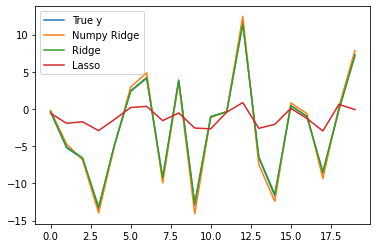

In [18]:
Graph_til = 20

plt.plot(y[:Graph_til], label = "True y")
plt.plot(y_numpy_ridge[:Graph_til], label = "Numpy Ridge")
plt.plot(y_ridge[:Graph_til], label = "Ridge")
plt.plot(y_lasso[:Graph_til], label = "Lasso")
plt.legend()